<a href="https://colab.research.google.com/github/greeshman32/Greeshman/blob/master/file%20relation%20(class%20project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as se

In [34]:
data=pd.read_csv('file.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
data.shape

(3444303, 12)

In [36]:
data.head()

,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
0,607,53170,1,?,1.0,?,1,1,1,1,1,True
1,88569,88592,1,?,1.0,?,1,1,1,1,1,True
2,21282,26255,1,?,1.0,?,1,1,1,1,1,True
3,20995,42541,1,?,1.0,?,1,1,1,1,1,True
4,27989,34739,1,?,1.0,?,1,1,1,1,1,True


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3444303 entries, 0 to 3444302
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id_1          int64  
 1   id_2          int64  
 2   cmp_fname_c1  object 
 3   cmp_fname_c2  object 
 4   cmp_lname_c1  float64
 5   cmp_lname_c2  object 
 6   cmp_sex       int64  
 7   cmp_bd        object 
 8   cmp_bm        object 
 9   cmp_by        object 
 10  cmp_plz       object 
 11  is_match      object 
dtypes: float64(1), int64(3), object(8)
memory usage: 315.3+ MB


In [38]:
data=data.replace("?",np.nan)

In [42]:
data.isnull().sum()

cmp_fname_c1     590
cmp_lname_c1       0
cmp_sex            0
cmp_bd           487
cmp_bm           487
cmp_by           487
cmp_plz         7748
is_match           1
dtype: int64

In [41]:
data=data.drop(['cmp_fname_c2','cmp_lname_c2'],axis=1)

In [44]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan, strategy='mean')
train=si.fit_transform(train)

In [33]:
data

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.1       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 1.        , ..., 0.22266782, 0.0055384 ,
        0.00364631]])

In [43]:
y=data['is_match']
train=data.drop(['is_match'],axis=1)

In [46]:
train

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.1       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 1.        , ..., 0.48888704, 0.22266782,
        0.0055384 ]])

In [50]:
si1=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [55]:
y=np.array(y)

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)

[1 1 1 ... 0 0 1]


In [63]:
from sklearn.model_selection import train_test_split

x_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.3,random_state=0)

In [64]:
from sklearn.svm import SVC
clf=SVC(C=10)
clf.fit(x_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
predtest=clf.predict(X_test)
predtrain=clf.predict(x_train)

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(predtest,y_test))
print(accuracy_score(predtrain,y_train))

0.9999854832762504
0.999990875200953


In [72]:
cm=confusion_matrix(predtest,y_test)
cm1=confusion_matrix(predtrain,y_train)

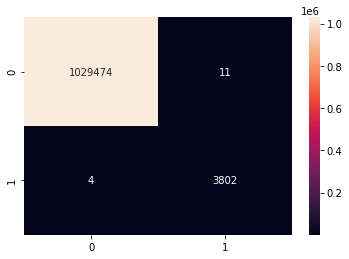

In [75]:
se.heatmap(cm,annot=True,fmt='.0f')


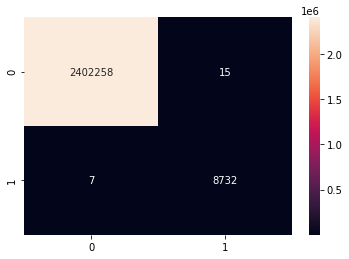

In [76]:
se.heatmap(cm1,annot=True,fmt='.0f')